#### Import libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
import random
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import collections
from collections import Counter
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report

#### Import data:

In [2]:
creditcard_csv = "/content/drive/MyDrive/UIT Projects/Khai thác dữ liệu/source/datasets/creditcard_dataset.csv"

df = pd.read_csv(creditcard_csv)
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [29]:
df.shape

(284807, 31)

#### Explore data:

- Columns in dataset:

In [3]:
print(list(df.keys()))

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


- Dataset columns type:

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

- Statistics:

In [4]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


- Count NULL values of dataset:

In [5]:
num_null = df.isnull().sum().max()
num_null

0

- Classifying attribute:

In [6]:
class_values = df['Class'].value_counts()
class_values

0    284315
1       492
Name: Class, dtype: int64

In [7]:
print('Percent of Frauds: {0}%'.format(round(class_values[1]/len(df) * 100,2)))
print('Percent of No Frauds: {0}%'.format(round(class_values[0]/len(df) * 100,2)))

Percent of Frauds: 0.17%
Percent of No Frauds: 99.83%


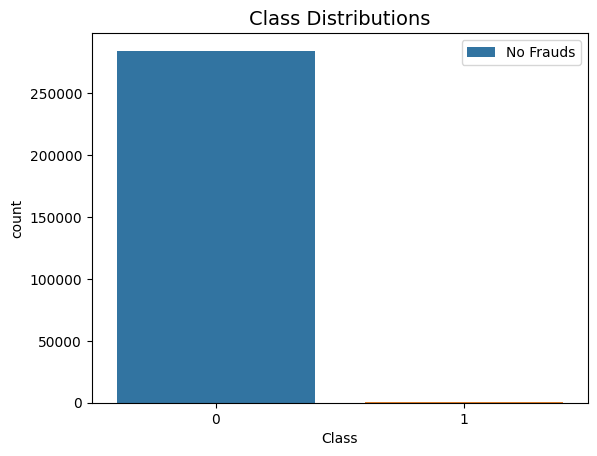

In [8]:
sns.countplot(x='Class', data=df)
plt.title('Class Distributions', fontsize=14)

plt.legend(labels=['No Frauds', 'Frauds'])

- Distribution of Amount, Time attributes:

<ipython-input-9-834d83c7196f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(amount_val, ax=ax[0], color='r')
<ipython-input-9-834d83c7196f>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(time_val, ax=ax[1], color='b')


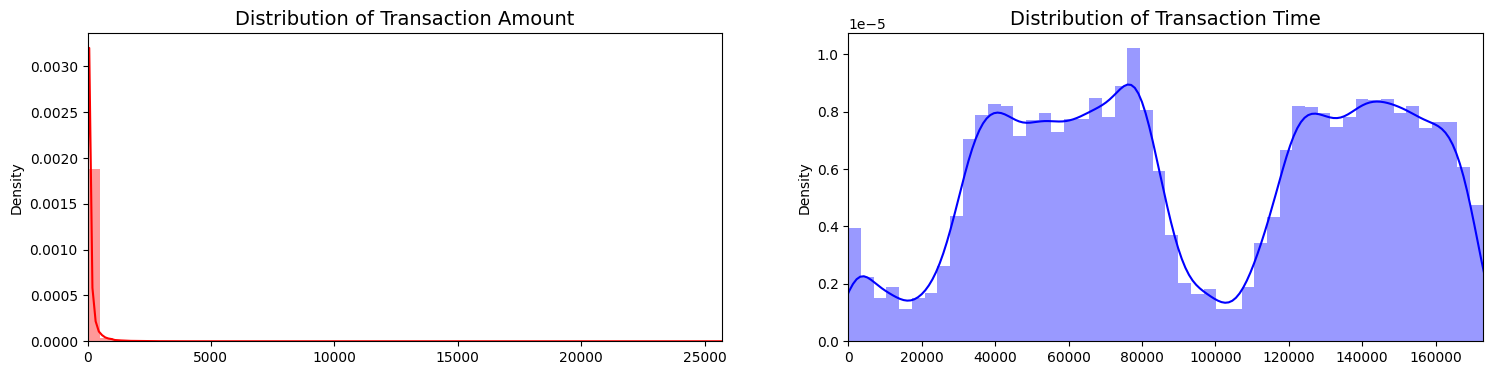

In [9]:
fig, ax = plt.subplots(1, 2, figsize=(18,4))

amount_val = df['Amount'].values
time_val = df['Time'].values

sns.distplot(amount_val, ax=ax[0], color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])

sns.distplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])

plt.show()

### Preprocessing data:

#### Scale data:

In [10]:
rob_scaler = RobustScaler()

scaled_amount = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
scaled_time = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time','Amount'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(1, 'scaled_time', scaled_time)

df.head(5)

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


#### Split data in train and test sets:

In [11]:
X = df.drop('Class', axis=1)
y = df['Class']

sss = StratifiedKFold(n_splits=5, random_state=None, shuffle=False)

for train_index, test_index in sss.split(X, y):
    print("Train:", train_index, "Test:", test_index)
    original_Xtrain, original_Xtest = X.iloc[train_index], X.iloc[test_index]
    original_ytrain, original_ytest = y.iloc[train_index], y.iloc[test_index]

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# original_Xtrain = original_Xtrain.values
# original_Xtest = original_Xtest.values
# original_ytrain = original_ytrain.values
# original_ytest = original_ytest.values

train_unique_label, train_counts_label = np.unique(original_ytrain.values, return_counts=True)
test_unique_label, test_counts_label = np.unique(original_ytest.values, return_counts=True)
print('-' * 100)

print('Label Distributions: \n')
print('Labels: {0}, percent: {1}'.format(train_unique_label, train_counts_label/ len(original_ytrain.values)))
print('Labels: {0}, percent: {1}'.format(test_unique_label, test_counts_label/ len(original_ytest.values), test_unique_label))

Train: [ 30473  30496  31002 ... 284804 284805 284806] Test: [    0     1     2 ... 57017 57018 57019]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 30473  30496  31002 ... 113964 113965 113966]
Train: [     0      1      2 ... 284804 284805 284806] Test: [ 81609  82400  83053 ... 170946 170947 170948]
Train: [     0      1      2 ... 284804 284805 284806] Test: [150654 150660 150661 ... 227866 227867 227868]
Train: [     0      1      2 ... 227866 227867 227868] Test: [212516 212644 213092 ... 284804 284805 284806]
----------------------------------------------------------------------------------------------------
Label Distributions: 

Labels: [0 1], percent: [0.99827076 0.00172924]
Labels: [0 1], percent: [0.99827952 0.00172048]


In [12]:
original_Xtrain

,scaled_amount,scaled_time,V1,V2,V3,V4,V5,V6,V7,V8,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,1.783274,-0.994983,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,-0.269825,-0.994983,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,4.983721,-0.994972,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,1.418291,-0.994972,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,0.670579,-0.994960,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
227864,-0.296793,0.711557,-1.329248,2.057312,0.417536,3.259226,2.031582,5.808571,-1.966416,-0.780131,...,0.940716,0.962591,-1.447473,-0.254170,0.172166,0.624782,-0.092178,0.215728,0.223553,0.132879
227865,-0.167819,0.711557,2.036041,0.259237,-1.771522,0.458296,0.584333,-0.820823,0.305824,-0.271230,...,-0.023326,-0.113310,-0.317084,-0.740493,0.283709,0.488747,-0.063826,-0.610194,0.007487,-0.013918
227866,0.475093,0.711569,-1.246150,0.863064,0.478690,0.405342,0.203485,0.168488,-0.136939,0.682942,...,-0.277785,-0.013211,-0.319465,-0.588918,-0.186107,0.468036,0.571794,-0.403076,0.259078,0.077267
227867,-0.167819,0.711569,-0.110603,0.858057,-1.273800,0.001574,2.404707,3.848640,-0.268571,1.300495,...,2.769259,0.165291,-0.089540,-0.301653,0.125633,0.700880,-0.769575,-0.193723,0.143983,0.134559


#### SMOTE (Over sampling):

In [13]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
Xsm_train, ysm_train = sm.fit_resample(original_Xtrain, original_ytrain)

In [ ]:
ysm_train

0         0
1         0
2         0
3         0
4         0
         ..
454899    1
454900    1
454901    1
454902    1
454903    1
Name: Class, Length: 454904, dtype: int64

#### Equally Distributing and Correlating:

- Distribution:

In [14]:
print('Distribution of the Classes in the subsample dataset')
print(ysm_train.value_counts()/len(ysm_train))

Distribution of the Classes in the subsample dataset
0    0.5
1    0.5
Name: Class, dtype: float64


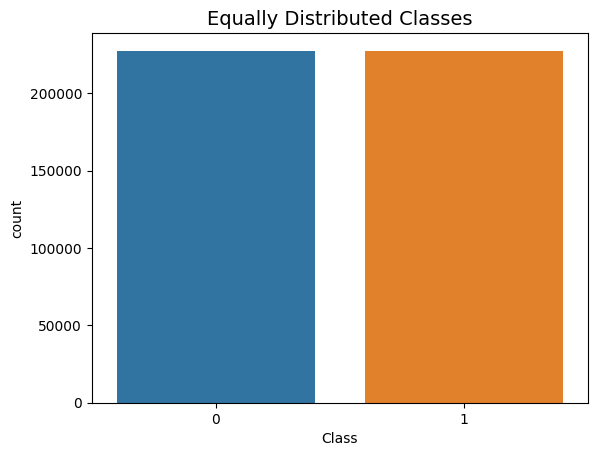

In [15]:
sns.countplot(data=ysm_train, x=ysm_train.index)
plt.title('Equally Distributed Classes', fontsize=14)
plt.show()

- Correlation:

In [26]:
cols = np.hstack((Xsm_train.columns, ['Class']))
cols
new_df = pd.DataFrame(np.hstack((Xsm_train, ysm_train.values.reshape(-1, 1))), columns=cols)

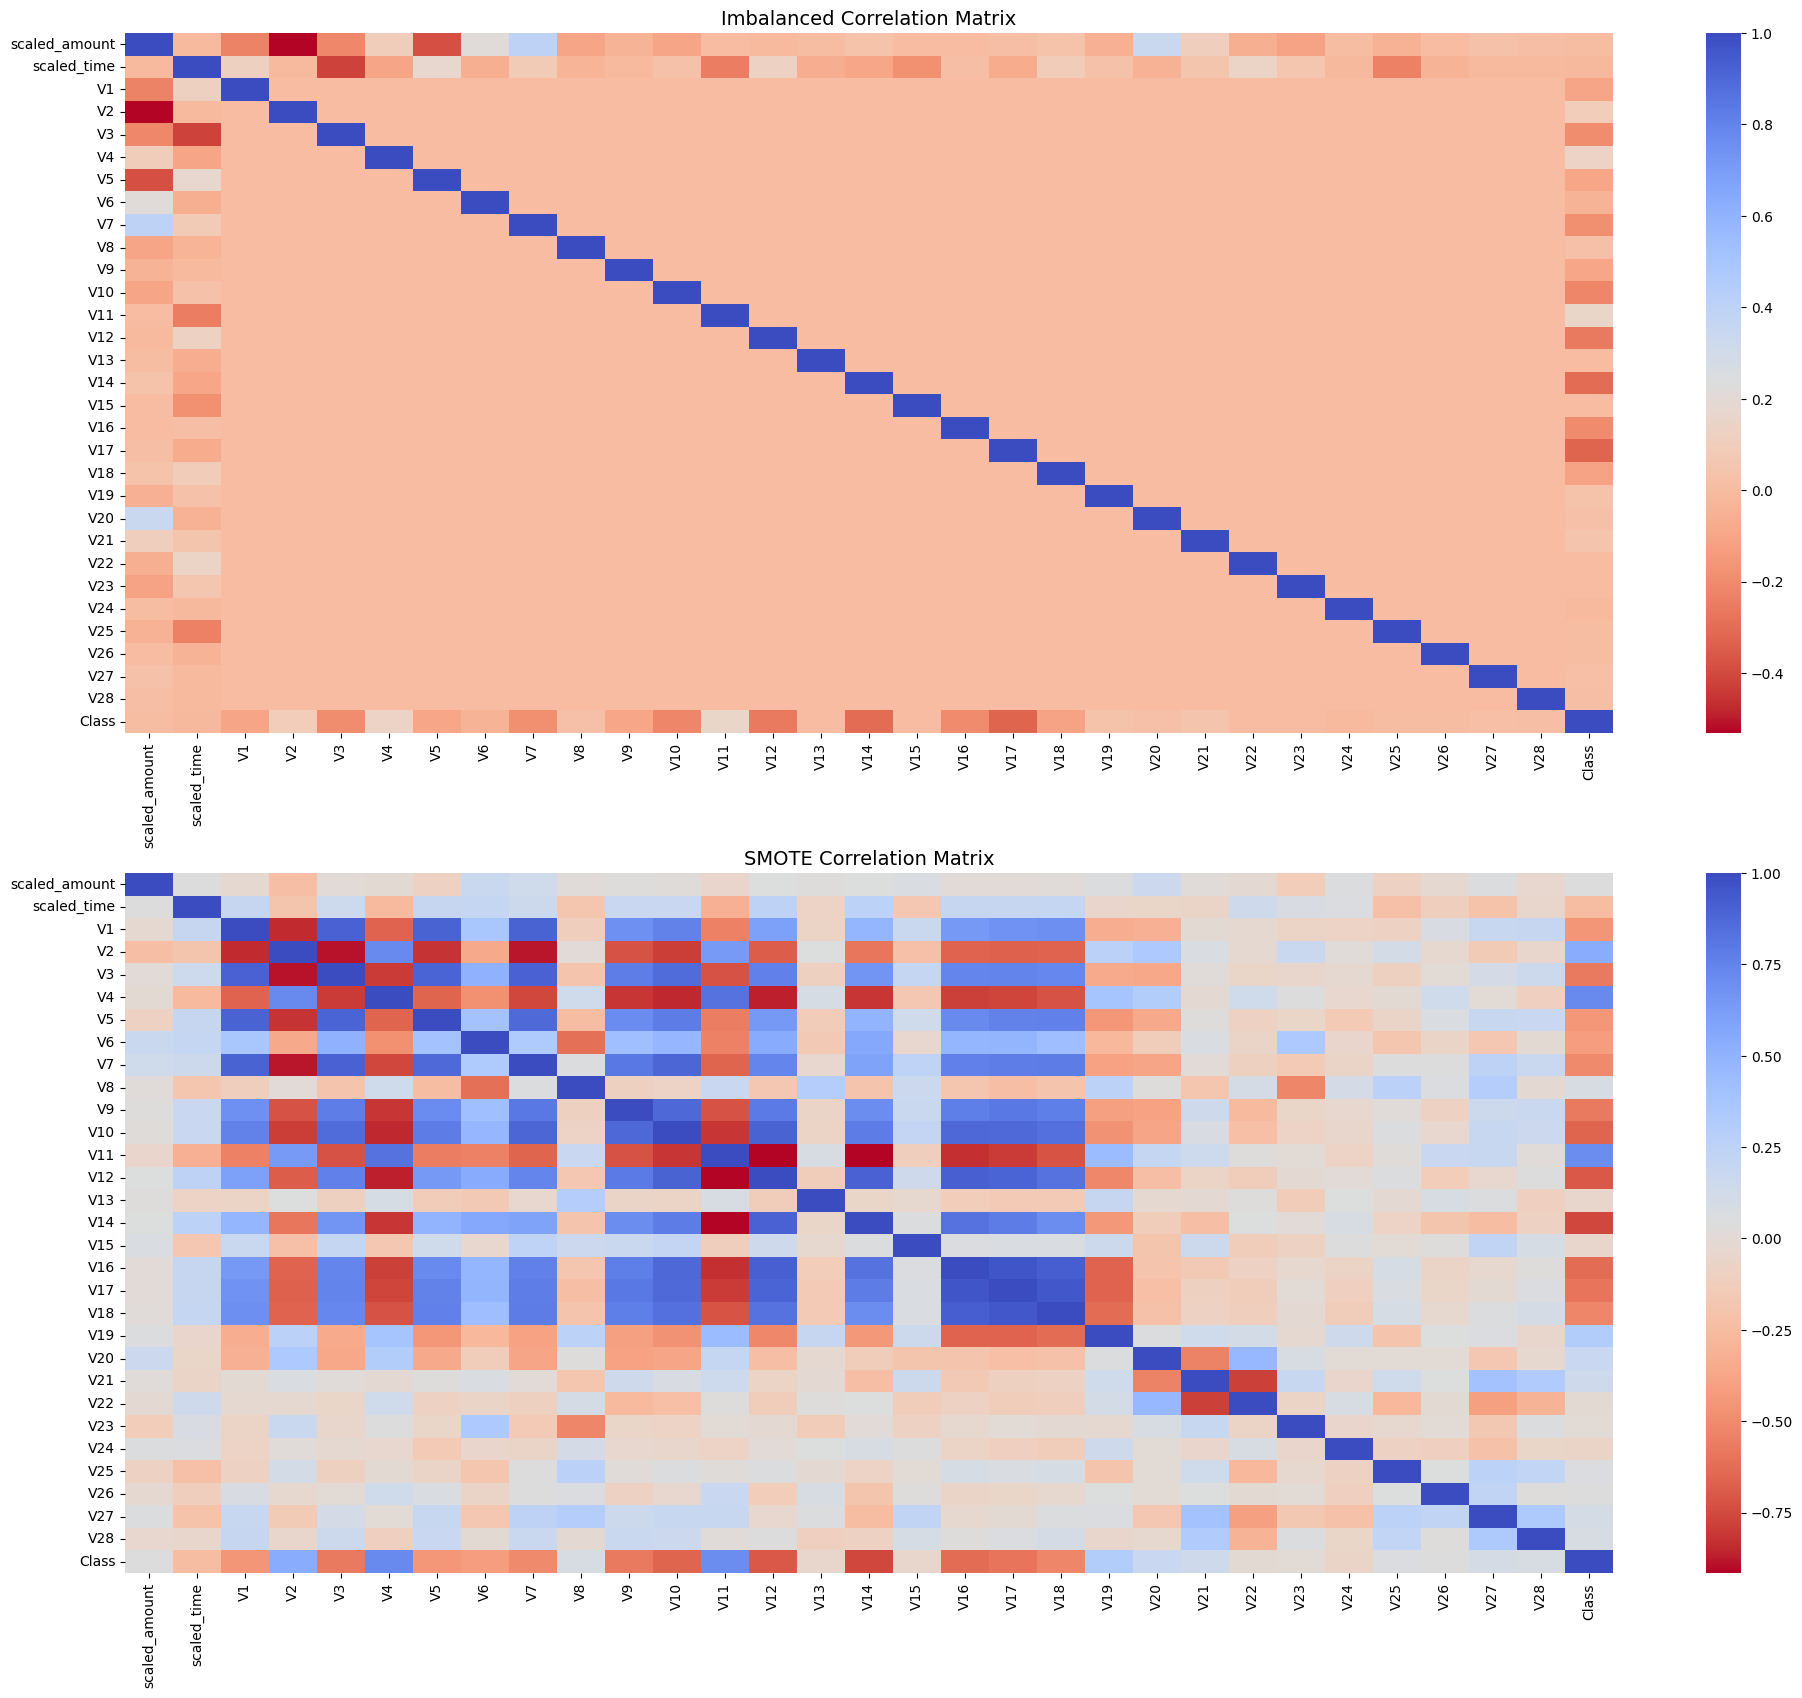

In [28]:
f, (ax1, ax2) = plt.subplots(2, 1, figsize=(24,20))

# Entire DataFrame
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax1)
ax1.set_title("Imbalanced Correlation Matrix", fontsize=14)


sub_sample_corr = new_df.corr()
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot_kws={'size':20}, ax=ax2)
ax2.set_title('SMOTE Correlation Matrix', fontsize=14)
plt.show()

### GA algorithm:

- Init gens and population size:

In [ ]:
POPULATION_SIZE = 100

ALL_GENEs = [
    'scaled_amount', 'scaled_time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
    'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
    'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28'
]

- Define Individual class:

In [ ]:
class Individual(object):
    def __init__(self, chromosome):
        self.chromosome = chromosome
        self.fitness = self.calculate_fitness()

    @classmethod
    def create_random_gene(self):
        global ALL_GENEs
        gene = random.choice(ALL_GENEs)
        return gene

    @classmethod
    def create_random_chromosome(self, chro_len):
        global TARGET
        chromosome_len = chro_len
        chromosome = []
        for _ in range(chromosome_len):
            random_gene = self.create_random_gene()
            chromosome.append(random_gene)
        return chromosome

    def crossover(self, individual_2):
        child_chromosome = []
        for gene_of_ind1, gene_of_ind2 in zip(self.chromosome, individual_2.chromosome):
            prob = random.random()

            if prob < 0.45:
                child_chromosome.append(gene_of_ind1)
            elif prob < 0.9:
                child_chromosome.append(gene_of_ind2)
            else:
                random_gene = self.create_random_gene()
                child_chromosome.append(random_gene)
        child = Individual(child_chromosome)
        return child

    def calculate_fitness(self):
        global TARGET
        fitness = 0
        rf = RandomForestClassifier(criterion= 'entropy', max_depth=4, max_features='log2', n_estimators=5)

        columns_to_train = list(np.unique(self.chromosome))
        X = Xsm_train[columns_to_train].values
        Y = ysm_train.values

        _, F, _, y = train_test_split(X, Y, test_size=0.1)
        Fx_train, Fx_test, Fy_train, Fy_test = train_test_split(F, y, test_size=0.2)

        rf.fit(Fx_train, Fy_train)
        # evaluating
        y_pred_test = rf.predict(Fx_test)
        test_score = accuracy_score(Fy_test, y_pred_test)

        fitness = test_score
        return fitness

- Features selection:

In [ ]:
max_generation = 100
current_generation = 1

population = []

# initialize population
for _ in range(POPULATION_SIZE):
    random_chromosome = Individual.create_random_chromosome(chro_len=10)
    _individual = Individual(random_chromosome)
    population.append(_individual)

# genetic process
while current_generation < max_generation:
    population = sorted(population, key = lambda x:x.fitness, reverse=True)

    next_generation_of_population = []

    _10_percent_len = int(10*POPULATION_SIZE/100)
    next_generation_of_population.extend(population[:_10_percent_len])

    _50_percent_len = int(POPULATION_SIZE/2)
    _90_percent_len = int(90*POPULATION_SIZE/100)
    for _ in range(_90_percent_len):
        # crossover top 50% individuals
        parent1 = random.choice(population[:_50_percent_len])
        parent2 = random.choice(population[:_50_percent_len])
        child = parent1.crossover(parent2)

        next_generation_of_population.append(child)

    population = next_generation_of_population
    current_generation += 1

    print("Current Generation: {0} -- Top 1 features: {1} -- Fitness: {2}".format(
                            current_generation,
                            ",".join(list(np.unique(population[0].chromosome))),
                            population[0].fitness))

Current Generation: 2 -- Top 1 features: V10,V12,V14,V21,V25,V4,V7,V8,scaled_time -- Fitness: 0.9473568524013628
Current Generation: 3 -- Top 1 features: V11,V12,V14,V15,V20,V21,V28,V4,V9,scaled_amount -- Fitness: 0.9496647983294868
Current Generation: 4 -- Top 1 features: V11,V12,V14,V15,V20,V21,V28,V4,V9,scaled_amount -- Fitness: 0.9496647983294868
Current Generation: 5 -- Top 1 features: V12,V14,V15,V16,V25,V26,V4,V7 -- Fitness: 0.9508737223870755
Current Generation: 6 -- Top 1 features: V12,V14,V15,V16,V25,V26,V4,V7 -- Fitness: 0.9508737223870755
Current Generation: 7 -- Top 1 features: V12,V14,V15,V16,V25,V26,V4,V7 -- Fitness: 0.9508737223870755
Current Generation: 8 -- Top 1 features: V10,V12,V14,V26,V4,V7 -- Fitness: 0.9537311792504671
Current Generation: 9 -- Top 1 features: V10,V12,V14,V26,V4,V7 -- Fitness: 0.9537311792504671
Current Generation: 10 -- Top 1 features: V12,V14,V23,V26,V3,V4,V6,V7,scaled_amount -- Fitness: 0.955599516430377
Current Generation: 11 -- Top 1 feature

In [ ]:
population[:5]

In [ ]:
top_features = ['V12','V14','V22','V23','V3','V4','V5','V8']

#### Train with RF:

In [ ]:
rf = RandomForestClassifier(criterion= 'entropy', max_depth=6, max_features='log2', n_estimators=3, n_jobs=10)
rf.fit(Xsm_train[top_features], ysm_train)
# evaluating
y_pred_rf = rf.predict(original_Xtest[top_features])

#### Train with Logistic Regression:

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=42)
lr.fit(Xsm_train[top_features], ysm_train)
# evaluating
lr = lr.predict(original_Xtest[top_features])

#### Train with Gaussian Naive Bayes:

In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(Xsm_train[top_features], ysm_train)
y_pred_gnb = gnb.predict(original_Xtest[top_features])

#### Train with KNN:

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(Xsm_train[top_features], ysm_train)
# evaluating
y_pred_knn = knn.predict(original_Xtest[top_features])

- CF:

[Text(0, 0.5, ''), Text(0, 1.5, '')]

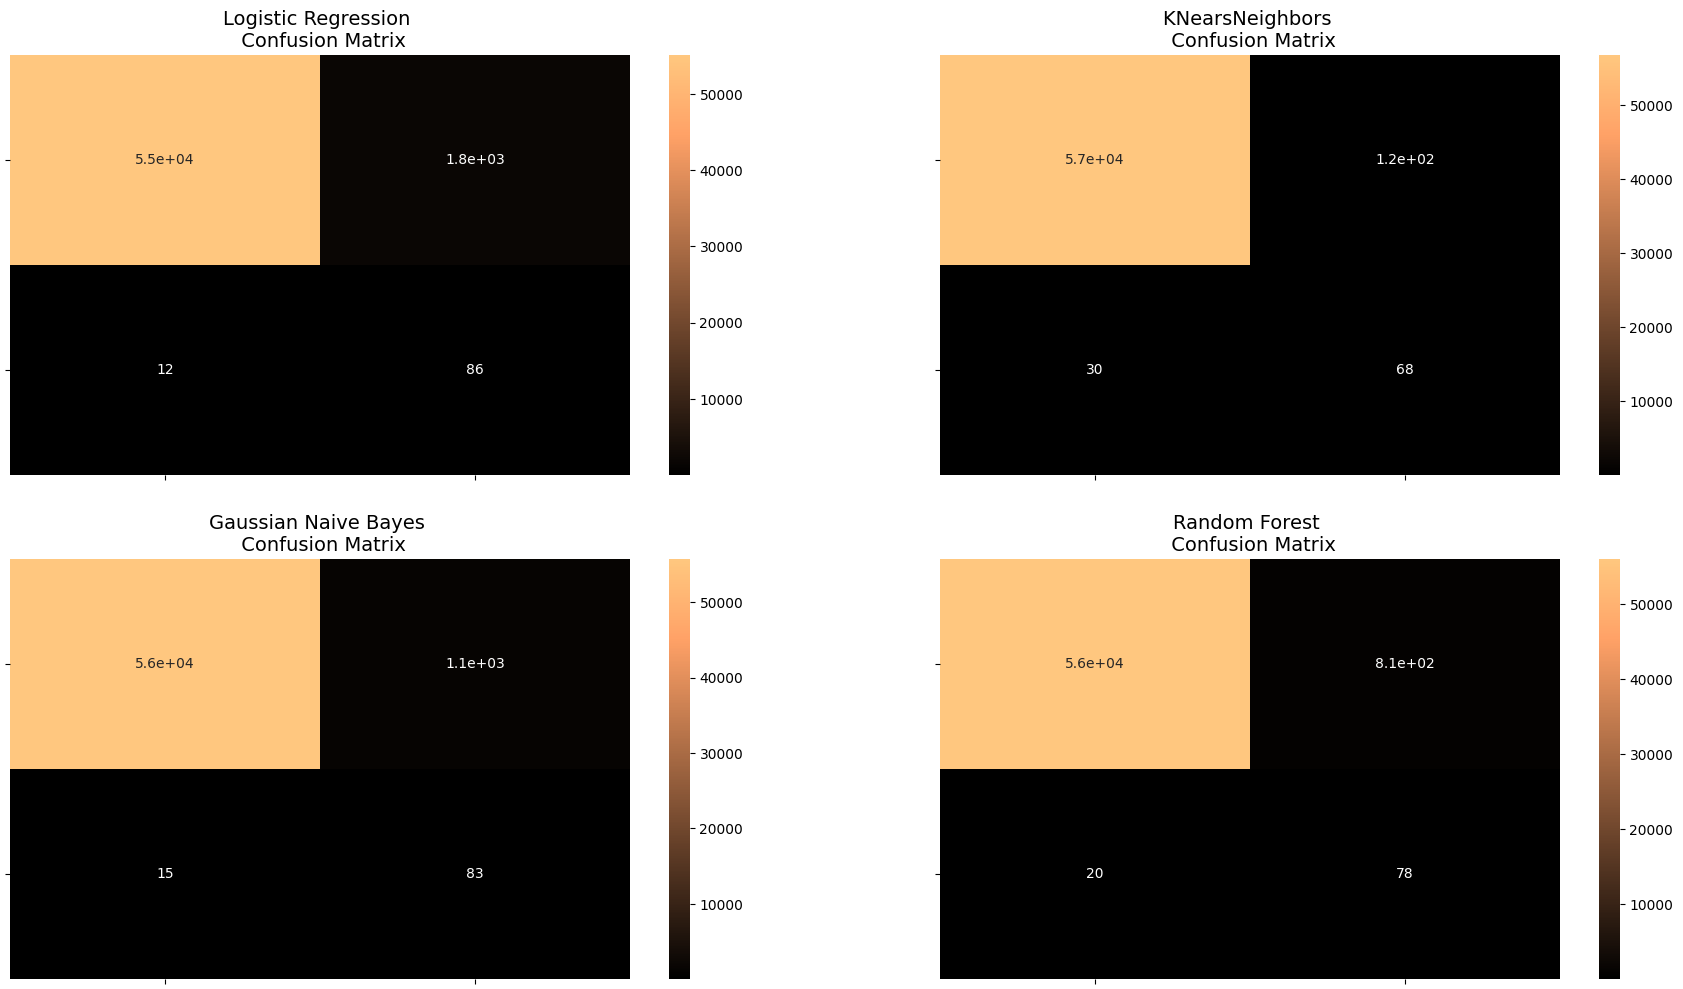

In [ ]:
from sklearn.metrics import confusion_matrix


log_reg_cf = confusion_matrix(original_ytest, lr)
kneighbors_cf = confusion_matrix(original_ytest, y_pred_knn)
gnb_cf = confusion_matrix(original_ytest, y_pred_gnb)
tree_cf = confusion_matrix(original_ytest, y_pred_rf)

fig, ax = plt.subplots(2, 2,figsize=(22,12))


sns.heatmap(log_reg_cf, ax=ax[0][0], annot=True, cmap=plt.cm.copper)
ax[0, 0].set_title("Logistic Regression \n Confusion Matrix", fontsize=14)
ax[0, 0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0, 0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(kneighbors_cf, ax=ax[0][1], annot=True, cmap=plt.cm.copper)
ax[0][1].set_title("KNearsNeighbors \n Confusion Matrix", fontsize=14)
ax[0][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[0][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(gnb_cf, ax=ax[1][0], annot=True, cmap=plt.cm.copper)
ax[1][0].set_title("Gaussian Naive Bayes \n Confusion Matrix", fontsize=14)
ax[1][0].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][0].set_yticklabels(['', ''], fontsize=14, rotation=360)

sns.heatmap(tree_cf, ax=ax[1][1], annot=True, cmap=plt.cm.copper)
ax[1][1].set_title("Random Forest \n Confusion Matrix", fontsize=14)
ax[1][1].set_xticklabels(['', ''], fontsize=14, rotation=90)
ax[1][1].set_yticklabels(['', ''], fontsize=14, rotation=360)

In [ ]:
from sklearn.metrics import classification_report

print('Logistic Regression:')
print(classification_report(original_ytest, lr))

print('KNears Neighbors:')
print(classification_report(original_ytest, y_pred_knn))

print('Gaussian Naive Bayes:')
print(classification_report(original_ytest, y_pred_gnb))

print('Random Forest:')
print(classification_report(original_ytest, y_pred_rf))

Logistic Regression:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98     56863
           1       0.05      0.88      0.09        98

    accuracy                           0.97     56961
   macro avg       0.52      0.92      0.54     56961
weighted avg       1.00      0.97      0.98     56961

KNears Neighbors:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56863
           1       0.37      0.69      0.48        98

    accuracy                           1.00     56961
   macro avg       0.68      0.85      0.74     56961
weighted avg       1.00      1.00      1.00     56961

Gaussian Naive Bayes:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56863
           1       0.07      0.85      0.13        98

    accuracy                           0.98     56961
   macro avg       0.53      0.91      0.56     56961
weighted avg 